In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Importing Data

## Food Dataset

In [2]:
df_food = pd.read_csv('../Data/Processed/df_food.csv')

df_food.head()

Date Location                    Products  Price
0  2017-01-01  Alberta          Almonds, 200 grams   3.84
1  2017-01-01  Alberta       Apple juice, 2 litres   2.90
2  2017-01-01  Alberta        Apples, per kilogram   3.86
3  2017-01-01  Alberta               Avocado, unit   1.56
4  2017-01-01  Alberta  Baby food, 128 millilitres   1.19

In [3]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91676 entries, 0 to 91675
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      91676 non-null  object 
 1   Location  91676 non-null  object 
 2   Products  91676 non-null  object 
 3   Price     91676 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.8+ MB


## Unemployment Rate by Sector

In [4]:
df_sector = pd.read_csv('../Data/Processed/df_sector.csv')

df_sector.head()

Date Location                 Sector  Unemployment Rate
0  2017-01   Canada  Total, all industries                7.2
1  2017-02   Canada  Total, all industries                7.0
2  2017-03   Canada  Total, all industries                7.2
3  2017-04   Canada  Total, all industries                6.8
4  2017-05   Canada  Total, all industries                6.6

In [5]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17974 entries, 0 to 17973
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               17974 non-null  object 
 1   Location           17974 non-null  object 
 2   Sector             17974 non-null  object 
 3   Unemployment Rate  15589 non-null  float64
dtypes: float64(1), object(3)
memory usage: 561.8+ KB


In [6]:
df_sector['Sector'].unique()

array(['Total, all industries', 'Goods-producing sector', 'Agriculture',
       'Forestry, fishing, mining, quarrying, oil and gas', 'Utilities',
       'Construction', 'Manufacturing', 'Services-producing sector',
       'Wholesale and retail trade', 'Transportation and warehousing',
       'Finance, insurance, real estate, rental and leasing',
       'Professional, scientific and technical services',
       'Business, building and other support services',
       'Educational services', 'Health care and social assistance',
       'Information, culture and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Public administration'], dtype=object)

In [7]:
df_sector_imputed = pd.read_csv('../Data/Processed/df_sector_imputed.csv')

df_sector_imputed.head()

Date Location  Unemployment Rate                 Sector
0  2017-01   Canada                7.2  Total, all industries
1  2017-02   Canada                7.0  Total, all industries
2  2017-03   Canada                7.2  Total, all industries
3  2017-04   Canada                6.8  Total, all industries
4  2017-05   Canada                6.6  Total, all industries

In [8]:
def convert_to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [9]:
df_food = convert_to_datetime(df_food)
df_sector = convert_to_datetime(df_sector)
df_sector_imputed = convert_to_datetime(df_sector_imputed)

In [10]:
df_food.head()

Date Location                    Products  Price
0 2017-01-01  Alberta          Almonds, 200 grams   3.84
1 2017-01-01  Alberta       Apple juice, 2 litres   2.90
2 2017-01-01  Alberta        Apples, per kilogram   3.86
3 2017-01-01  Alberta               Avocado, unit   1.56
4 2017-01-01  Alberta  Baby food, 128 millilitres   1.19

# Visualizations



In [11]:
# Create a list of locations, with Canada first, the rest in alphabetical order

unique_locations = df_sector['Location'].unique()

unique_locations

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [12]:
sorted_locs = sorted(unique_locations)

sorted_locs

['Alberta',
 'British Columbia',
 'Canada',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan']

In [13]:
sorted_locs.remove('Canada')
sorted_locs.insert(0, 'Canada')

sorted_locs

['Canada',
 'Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan']

In [14]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17974 entries, 0 to 17973
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               17974 non-null  datetime64[ns]
 1   Location           17974 non-null  object        
 2   Sector             17974 non-null  object        
 3   Unemployment Rate  15589 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 561.8+ KB


# Plot 1
## User Adjusts Sector and Location

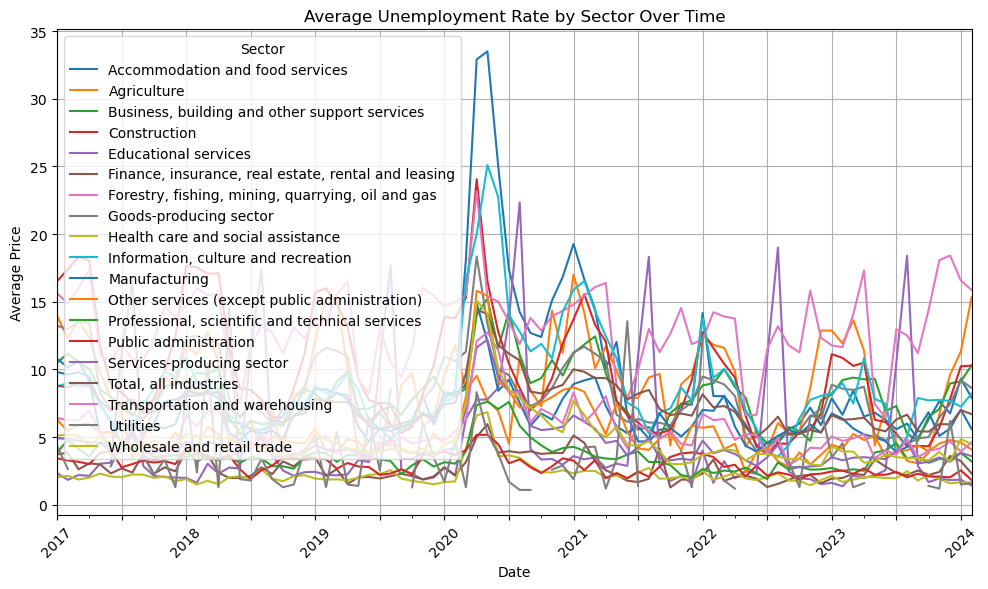

In [15]:
# Group the data by Date and Location and calculate the mean price
grouped_data = df_sector.groupby(['Date', 'Sector'])['Unemployment Rate'].mean().unstack()


grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Unemployment Rate by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Sector', loc='upper left')
plt.xticks(pd.date_range(start=grouped_data.index.min(), end=grouped_data.index.max(), freq='6MS'), rotation=45)
plt.tight_layout()
plt.show()

In [16]:
#For VS Code

# Group foods by location and date
grouped_data = df_sector.groupby(['Date', 'Sector'])['Unemployment Rate'].mean().unstack().reset_index()


# Create a line plot
fig = px.line(grouped_data, x='Date', y=grouped_data.columns[1:], 
              title='Unemployment Rate by Sector')

# Layout - modified in VS Code afterwards
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Unemployment Rate',
    legend_title='Sector',
    xaxis=dict(
        tickmode='linear',
        tick0=grouped_data['Date'].min(),
        dtick='M6',
        tickformat='%Y-%m'
    ),
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Plot
fig.show()

## Imputed - KNN Imputer

In [17]:
# Group unemployment rate by location and date
grouped_data = df_sector_imputed.groupby(['Date', 'Sector'])['Unemployment Rate'].mean().unstack().reset_index()


# Create a line plot
fig = px.line(grouped_data, x='Date', y=grouped_data.columns[1:], 
              title='Unemployment Rate by Sector')

# Layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Unemployment Rate',
    legend_title='Sector',
    xaxis=dict(
        tickmode='linear',
        tick0=grouped_data['Date'].min(),
        dtick='M6',
        tickformat='%Y-%m'
    ),
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Plot
fig.show()

## Plotting Unemployment and Food Prices

In [18]:
# Group by 'Location' and 'Date' and 'Category' and calculate the average 'Price'
averages_food = df_food.groupby(['Location', 'Date']).agg({'Price': 'mean'}).reset_index()

averages_food.head(10)

Location       Date     Price
0  Alberta 2017-01-01  4.075790
1  Alberta 2017-02-01  4.044182
2  Alberta 2017-03-01  4.065686
3  Alberta 2017-04-01  4.107278
4  Alberta 2017-05-01  4.228110
5  Alberta 2017-06-01  4.245211
6  Alberta 2017-07-01  4.160375
7  Alberta 2017-08-01  4.118036
8  Alberta 2017-09-01  4.086945
9  Alberta 2017-10-01  4.047813

In [19]:
df_sector.head()

Date Location                 Sector  Unemployment Rate
0 2017-01-01   Canada  Total, all industries                7.2
1 2017-02-01   Canada  Total, all industries                7.0
2 2017-03-01   Canada  Total, all industries                7.2
3 2017-04-01   Canada  Total, all industries                6.8
4 2017-05-01   Canada  Total, all industries                6.6

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group foods by location and date
grouped_sector = df_sector.groupby(['Date', 'Sector'])['Unemployment Rate'].mean().unstack().reset_index()

# Group food prices by date
grouped_food = df_food.groupby('Date')['Price'].mean().reset_index()

# Create a line plot
fig = px.line(grouped_data, x='Date', y=grouped_data.columns[1:], 
              title='Unemployment Rate by Sector')

# Add food prices to the plot
fig.add_trace(go.Scatter(x=grouped_food['Date'], y=grouped_food['Price'], mode='lines', name='Price'))

# Layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Sector',
    xaxis=dict(
        tickmode='linear',
        tick0=grouped_data['Date'].min(),
        dtick='M6',
        tickformat='%Y-%m'
    ),
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Plot
fig.show()


https://stackoverflow.com/questions/62287001/how-to-overlay-two-plots-in-same-figure-in-plotly-create-pareto-chart-in-plotl

In [21]:


# Group sector by sector and date
grouped_sector = df_sector.groupby(['Date', 'Sector'])['Unemployment Rate'].mean().unstack().reset_index()

# Group food prices by date
grouped_food = df_food.groupby('Date')['Price'].mean().reset_index()

trace_sector = go.Figure()
for column in grouped_sector.columns[1:]:
    trace_sector.add_trace(go.Scatter(x=grouped_sector['Date'], 
                                      y=grouped_sector[column], mode='lines', 
                                      name=column))

trace_food = go.Figure()
trace_food.add_trace(go.Scatter(x=grouped_food['Date'], 
                                y=grouped_food['Price'], 
                                mode='lines', 
                                line=dict(color='black'), 
                                name='Price'))

fig = make_subplots(specs=[[{"secondary_y": True}]])
for trace in trace_sector.data:
    fig.add_trace(trace)
fig.add_trace(trace_food.data[0], secondary_y=True)

fig.update_layout(
    height=600,
    width=1200,
    title='Unemployment Rate and Food Price by Sector',
    xaxis=dict(tickangle=45),
    legend_title='Sector'
)

pio.show(fig)


# Plotting correlations - not used

In [22]:
df_food.head()

Date Location                    Products  Price
0 2017-01-01  Alberta          Almonds, 200 grams   3.84
1 2017-01-01  Alberta       Apple juice, 2 litres   2.90
2 2017-01-01  Alberta        Apples, per kilogram   3.86
3 2017-01-01  Alberta               Avocado, unit   1.56
4 2017-01-01  Alberta  Baby food, 128 millilitres   1.19

In [23]:
df_food[df_food.isna().any(axis=1)]

Empty DataFrame
Columns: [Date, Location, Products, Price]
Index: []

In [24]:
# Group by 'Location' and 'Date' and 'Category' and calculate the average 'Price'
averages_food = df_food.groupby(['Location', 'Date']).agg({'Price': 'mean'}).reset_index()

averages_food.head(10)

Location       Date     Price
0  Alberta 2017-01-01  4.075790
1  Alberta 2017-02-01  4.044182
2  Alberta 2017-03-01  4.065686
3  Alberta 2017-04-01  4.107278
4  Alberta 2017-05-01  4.228110
5  Alberta 2017-06-01  4.245211
6  Alberta 2017-07-01  4.160375
7  Alberta 2017-08-01  4.118036
8  Alberta 2017-09-01  4.086945
9  Alberta 2017-10-01  4.047813

In [25]:
# Merging the two dfs

merged_sector_food = pd.merge(averages_food, df_sector_imputed, on=['Date', 'Location'])

merged_sector_food.head(15)

Location       Date    Price  Unemployment Rate  \
0   Alberta 2017-01-01  4.07579           8.900000   
1   Alberta 2017-01-01  4.07579          10.200000   
2   Alberta 2017-01-01  4.07579           3.800000   
3   Alberta 2017-01-01  4.07579           8.000000   
4   Alberta 2017-01-01  4.07579          13.800000   
5   Alberta 2017-01-01  4.07579           8.800000   
6   Alberta 2017-01-01  4.07579           5.000000   
7   Alberta 2017-01-01  4.07579           5.200000   
8   Alberta 2017-01-01  4.07579           4.300000   
9   Alberta 2017-01-01  4.07579           8.500000   
10  Alberta 2017-01-01  4.07579           4.800000   
11  Alberta 2017-01-01  4.07579          12.800000   
12  Alberta 2017-01-01  4.07579           6.611788   
13  Alberta 2017-01-01  4.07579           0.800000   
14  Alberta 2017-01-01  4.07579           9.000000   

                                               Sector  
0                               Total, all industries  
1                              Goods-producing sector  
2                                         Agriculture  
3   Forestry, fishing, mining, quarrying, oil and gas  
4                                        Construction  
5                                       Manufacturing  
6                           Services-producing sector  
7                          Wholesale and retail trade  
8                      Transportation and warehousing  
9   Finance, insurance, real estate, rental and le...  
10    Professional, scientific and technical services  
11      Business, building and other support services  
12                               Educational services  
13                  Health care and social assistance  
14                Information, culture and recreation

In [26]:
# Pivot the DataFrame to have one row per unique combination of Date, Location, and Sector
pivot_sector = merged_sector_food.pivot_table(index=['Date', 'Location'], columns='Sector', values=['Price', 'Unemployment Rate'])

# Flatten the hierarchical columns
pivot_sector.columns = ['/'.join(map(str, col)) for col in pivot_sector.columns.values]

# Reset the index to make Date and Location regular columns
pivot_sector.reset_index(inplace=True)

pivot_sector.head()

Date          Location  Price/Accommodation and food services  \
0 2017-01-01           Alberta                               4.075790   
1 2017-01-01  British Columbia                               4.108445   
2 2017-01-01            Canada                               3.873180   
3 2017-01-01          Manitoba                               3.978443   
4 2017-01-01     New Brunswick                               4.010241   

   Price/Agriculture  Price/Business, building and other support services  \
0           4.075790                                           4.075790     
1           4.108445                                           4.108445     
2           3.873180                                           3.873180     
3           3.978443                                           3.978443     
4           4.010241                                           4.010241     

   Price/Construction  Price/Educational services  \
0            4.075790                    4.075790   
1            4.108445                    4.108445   
2            3.873180                    3.873180   
3            3.978443                    3.978443   
4            4.010241                    4.010241   

   Price/Finance, insurance, real estate, rental and leasing  \
0                                           4.075790           
1                                           4.108445           
2                                           3.873180           
3                                           3.978443           
4                                           4.010241           

   Price/Forestry, fishing, mining, quarrying, oil and gas  \
0                                           4.075790         
1                                           4.108445         
2                                           3.873180         
3                                           3.978443         
4                                           4.010241         

   Price/Goods-producing sector  ...  \
0                      4.075790  ...   
1                      4.108445  ...   
2                      3.873180  ...   
3                      3.978443  ...   
4                      4.010241  ...   

   Unemployment Rate/Health care and social assistance  \
0                                                0.8     
1                                                2.6     
2                                                1.9     
3                                                1.4     
4                                                2.3     

   Unemployment Rate/Information, culture and recreation  \
0                                                9.0       
1                                                4.8       
2                                                6.5       
3                                                6.0       
4                                               11.4       

   Unemployment Rate/Manufacturing  \
0                              8.8   
1                              2.3   
2                              5.8   
3                              5.5   
4                             16.9   

   Unemployment Rate/Other services (except public administration)  \
0                                                6.2                 
1                                                4.4                 
2                                                4.7                 
3                                                3.3                 
4                                                4.3                 

   Unemployment Rate/Professional, scientific and technical services  \
0                                           4.800000                   
1                                           2.500000                   
2                                           3.000000                   
3                                           3.500000                   
4                                           6.611788                

In [27]:
pivot_sector[pivot_sector.isna().any(axis=1)]

Empty DataFrame
Columns: [Date, Location, Price/Accommodation and food services, Price/Agriculture, Price/Business, building and other support services, Price/Construction, Price/Educational services, Price/Finance, insurance, real estate, rental and leasing, Price/Forestry, fishing, mining, quarrying, oil and gas, Price/Goods-producing sector, Price/Health care and social assistance, Price/Information, culture and recreation, Price/Manufacturing, Price/Other services (except public administration), Price/Professional, scientific and technical services, Price/Public administration, Price/Services-producing sector, Price/Total, all industries, Price/Transportation and warehousing, Price/Wholesale and retail trade, Unemployment Rate/Accommodation and food services, Unemployment Rate/Agriculture, Unemployment Rate/Business, building and other support services, Unemployment Rate/Construction, Unemployment Rate/Educational services, Unemployment Rate/Finance, insurance, real estate, rental and leasing, Unemployment Rate/Forestry, fishing, mining, quarrying, oil and gas, Unemployment Rate/Goods-producing sector, Unemployment Rate/Health care and social assistance, Unemployment Rate/Information, culture and recreation, Unemployment Rate/Manufacturing, Unemployment Rate/Other services (except public administration), Unemployment Rate/Professional, scientific and technical services, Unemployment Rate/Public administration, Unemployment Rate/Services-producing sector, Unemployment Rate/Total, all industries, Unemployment Rate/Transportation and warehousing, Unemployment Rate/Wholesale and retail trade]
Index: []

[0 rows x 38 columns]

/Users/nastasiakantsevitch/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



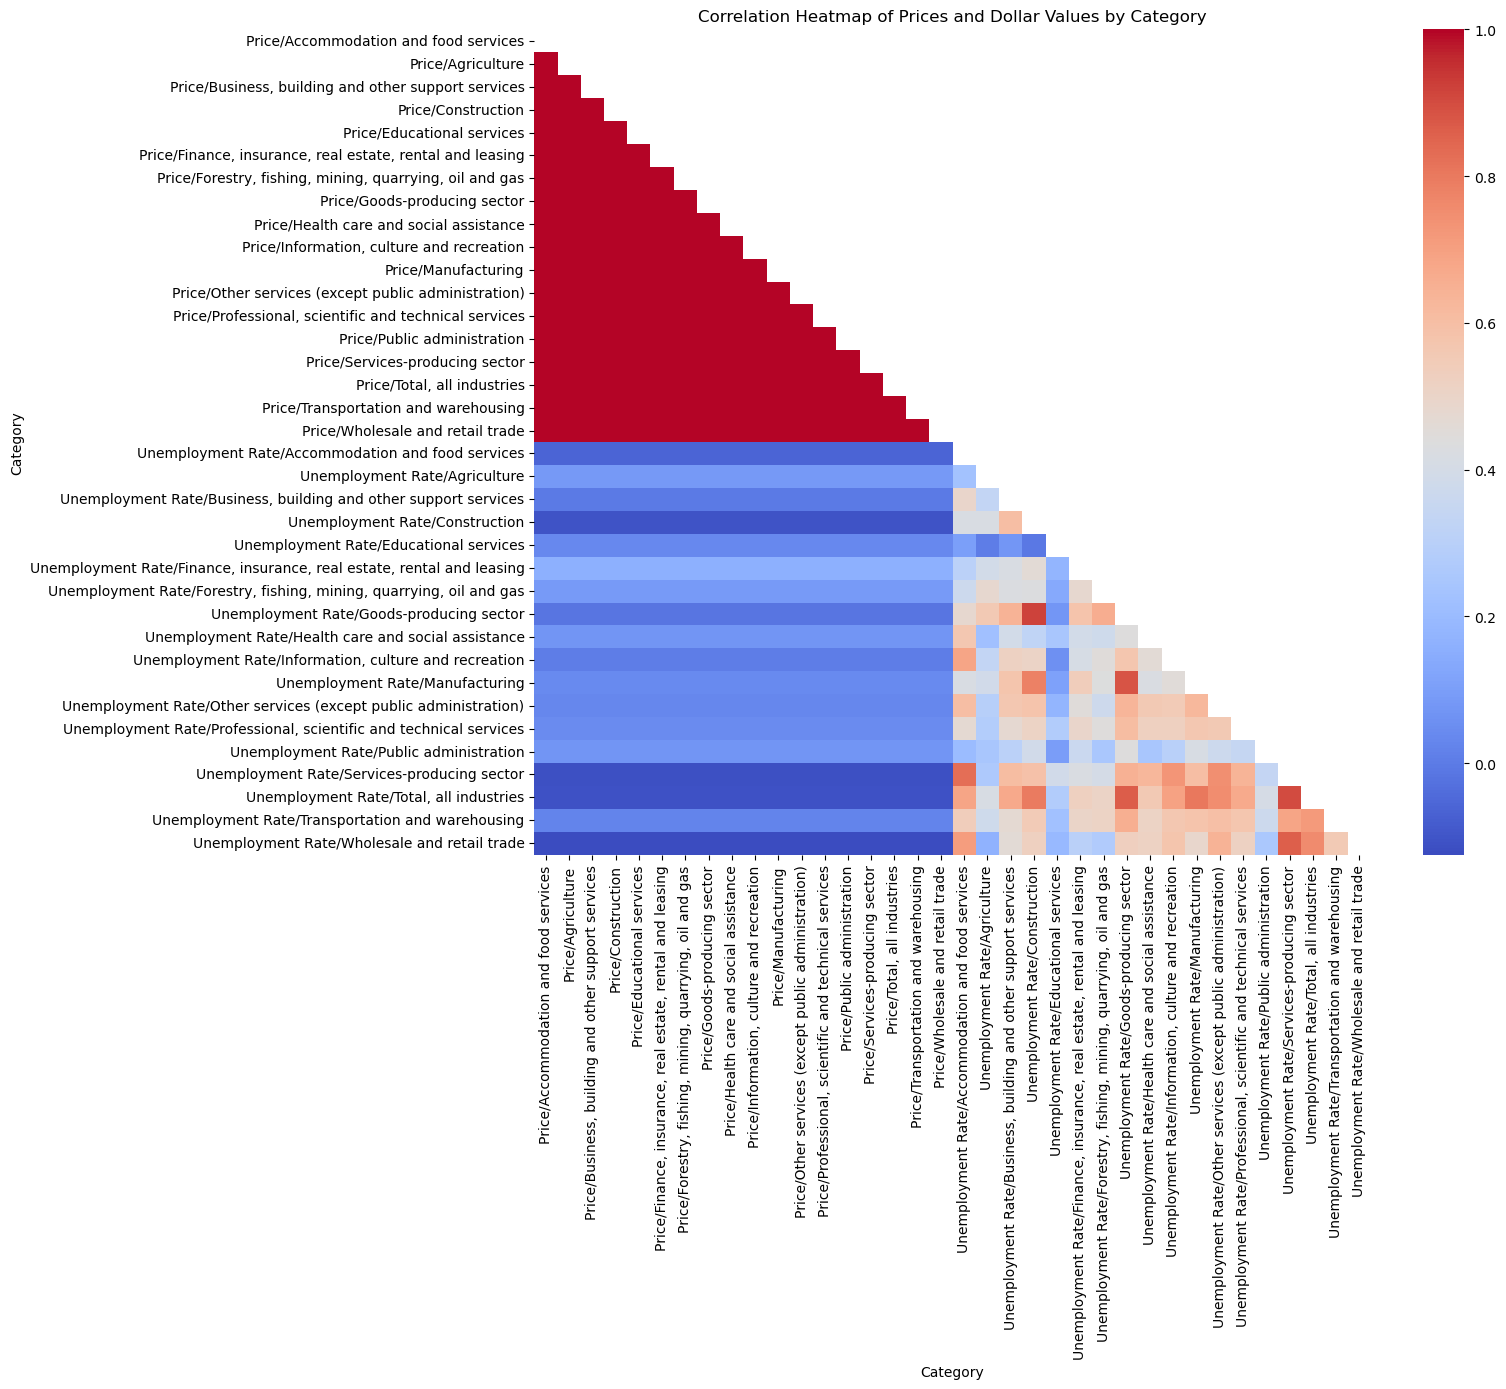

In [28]:
# Calculate the correlation matrix
corr = pivot_sector.drop(['Date', 'Location'], axis=1).corr()

# to remove top right triangle, redundant
mask = np.triu(np.ones_like(corr, dtype=bool),) 

# Create a heatmap for the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", mask=mask)
plt.title('Correlation Heatmap of Prices and Dollar Values by Category')
plt.xlabel('Category')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
merged_sector_food.head()

Location       Date    Price  Unemployment Rate  \
0  Alberta 2017-01-01  4.07579                8.9   
1  Alberta 2017-01-01  4.07579               10.2   
2  Alberta 2017-01-01  4.07579                3.8   
3  Alberta 2017-01-01  4.07579                8.0   
4  Alberta 2017-01-01  4.07579               13.8   

                                              Sector  
0                              Total, all industries  
1                             Goods-producing sector  
2                                        Agriculture  
3  Forestry, fishing, mining, quarrying, oil and gas  
4                                       Construction

In [30]:
# Create a pivot table with sectors as columns and unemployment rates as values
pivot_df = merged_sector_food.pivot_table(index=['Date', 'Location', 'Price'], columns='Sector', values='Unemployment Rate')


pivot_df.reset_index(inplace=True)

# Display the transposed DataFrame
pivot_df

Sector       Date              Location     Price  \
0      2017-01-01               Alberta  4.075790   
1      2017-01-01      British Columbia  4.108445   
2      2017-01-01                Canada  3.873180   
3      2017-01-01              Manitoba  3.978443   
4      2017-01-01         New Brunswick  4.010241   
..            ...                   ...       ...   
941    2024-02-01           Nova Scotia  5.566612   
942    2024-02-01               Ontario  5.086624   
943    2024-02-01  Prince Edward Island  5.589122   
944    2024-02-01                Quebec  5.286876   
945    2024-02-01          Saskatchewan  5.291220   

Sector  Accommodation and food services  Agriculture  \
0                                   6.6     3.800000   
1                                   4.5    22.700000   
2                                   6.8     7.300000   
3                                   7.2     6.611788   
4                                   7.1    15.400000   
..                                  ...          ...   
941                                 8.1    21.300000   
942                                 6.6     3.800000   
943                                 8.6    25.000000   
944                                 8.0     6.611788   
945                                 4.2     3.600000   

Sector  Business, building and other support services  Construction  \
0                                           12.800000          13.8   
1                                            7.100000           5.4   
2                                            9.100000          12.2   
3                                            9.200000          10.6   
4                                            7.900000          26.7   
..                                                ...           ...   
941                                         11.000000          11.1   
942                                         10.000000           6.7   
943                                         20.000000           8.0   
944                                          8.000000           7.7   
945                                          6.611788          10.7   

Sector  Educational services  \
0                   6.611788   
1                   2.200000   
2                   2.100000   
3                   2.200000   
4                   2.800000   
..                       ...   
941                 2.400000   
942                 0.700000   
943                 6.611788   
944                 1.400000   
945                 0.900000   

Sector  Finance, insurance, real estate, rental and leasing  \
0                                                8.500000     
1                                                2.200000     
2                                                2.800000     
3                                                1.900000     
4                                                2.600000     
..                                                    ...     
941                                              4.100000     
942                                              2.000000     
943                                              6.611788     
944                                              1.700000     
945                                              2.300000     

Sector  Forestry, fishing, mining, quarrying, oil and gas  ...  \
0                                                     8.0  ...   
1                                                    12.3  ...   
2                                                    10.8  ...   
3                                                     6.2  ...   
4                                                    31.1  ...   
..                                                    ...  ...   
941                                                  22.1  ...   
942                                                   7.2  ...   
943                                                  59.1  ...   
944                                

/Users/nastasiakantsevitch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/nastasiakantsevitch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<function matplotlib.pyplot.show(close=None, block=None)>

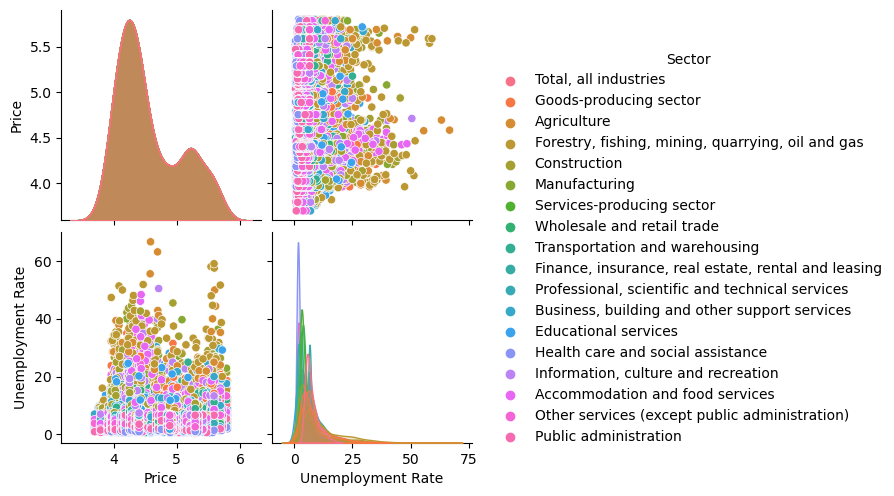

In [31]:
sns.pairplot(merged_sector_food[['Price', 'Unemployment Rate', 'Sector']], hue='Sector')

plt.show